In [81]:
import numpy as np
from sklearn import datasets, model_selection, linear_model,preprocessing
import matplotlib.pyplot as plt

In [82]:
# load the dataset
iris = datasets.load_iris()
x = iris.data[0:100,]
y = iris.target[0:100]

In [83]:
# data preprocessing

# scaling the data
#x = preprocessing.scale(x)
# split the data into train and test
x_train, x_test, y_train, y_test = model_selection.train_test_split(x,y,test_size=0.3, random_state=42)

m, n = x_train.shape[0], len(iris.feature_names)

ones = np.ones((m,1))
A = np.append(ones,x_train,axis=1)
b = y_train

In [84]:
# using sklearn logistic regression 
lgr = linear_model.LogisticRegression()
lgr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [85]:
lgr.intercept_

array([-0.25266853])

In [86]:
lgr.coef_

array([[-0.36532964, -1.3577868 ,  2.09339161,  0.95557712]])

In [91]:
def learn_parameters(theta, A, b, m, n, alpha=0.01):
    for i in range(0,n+1):
        value = 0
        for j in range(0,m):
            exponent = (np.dot(theta.T, np.reshape(A[j:j+1,], (n+1,1)))[0,0])
            value += ((1/(1+np.exp(-exponent)))- b[j])*A[j,i]
            
        theta[i,0] += alpha*value
    return theta

In [94]:
# define theta 
theta = np.zeros((n+1,1))

# define learning rate
alpha = 0.01

while True:
    new_theta = learn_parameters(np.copy(theta),A,b,m,n,alpha)
    l = list(b)
    no_of_zeros = l.count(0)
    no_of_ones = l.count(1)
    likelihood_prev, likelihood_new = 1,1
    for i in range(0, m):
        coeff_prev = (np.dot(theta.T, np.reshape(A[i:i+1,], (n+1,1))))[0,0]
        coeff_new = (np.dot(new_theta.T, np.reshape(A[i:i+1,], (n+1,1))))[0,0]
        if b[i] == 0:
            likelihood_prev *= (1-(1/(1+np.exp(-coeff_prev))))
            likelihood_new *= (1-(1/(1+np.exp(-coeff_new))))
        else:
            likelihood_prev *= (1/(1+np.exp(-coeff_prev)))
            likelihood_new *= (1/(1+np.exp(-coeff_new)))
    # convergence condition
    if abs(likelihood_prev-likelihood_new)<=0.1:
        print(new_theta)
        break
    theta = np.copy(new_theta)
        
            
            

[[0.05      ]
 [0.28439575]
 [0.47188716]
 [0.52213158]
 [0.14434812]]


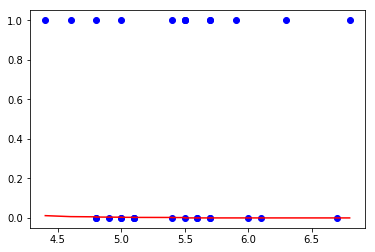

In [89]:
m, n = x_test.shape[0], len(iris.feature_names)

x_test = np.sort(x_test, axis=0)
ones = np.ones((m,1))
A = np.append(ones,x_test,axis=1)

exponent = (np.dot( A, new_theta)).ravel()
y_pred = (1/(1+np.exp(-exponent)))

fig, aux = plt.subplots()
aux.plot(x_test[:, 0], y_test, 'bo', x_test[:, 0], y_pred, 'r-')
plt.show()
